<a href="https://colab.research.google.com/github/MoudiAlhazzaa/Data_field_job_analysis_Mu/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adam:

## Data Loading and Initial Exploration:

### Importing pandas and loading the data:

In [ ]:
import pandas as pd
df = pd.read_csv('./jobs_in_data_2024.csv', sep = ',')

### Intial data exploaration :

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


In [ ]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
947,2024,Mid-level,Full-time,Business Intelligence Analyst,142000,USD,142000,Canada,In-person,Canada,M,BI and Visualization
841,2024,Senior,Full-time,Analytics Engineer,170000,USD,170000,United States,In-person,United States,M,Leadership and Management
9822,2023,Executive,Full-time,Data Scientist,180000,USD,180000,United States,Remote,United States,M,Data Science and Research
3138,2024,Mid-level,Full-time,Data Scientist,166000,USD,166000,United States,In-person,United States,M,Data Science and Research
13811,2022,Senior,Full-time,Data Engineer,160000,USD,160000,United States,Remote,United States,M,Data Engineering


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


## Data Cleaning:

### Checking for null values:

In [ ]:
nan_count = df.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 0


### Checking for duplicates:

In [ ]:
duplicate_rows = df.duplicated().sum()

print('Number of duplicate rows:',duplicate_rows)

Number of duplicate rows: 5493


### Checking which categorical coloumns need to be addressed:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


### Dealing with duplicates:

### Dealing with categorical coloumns:

## testing plots:

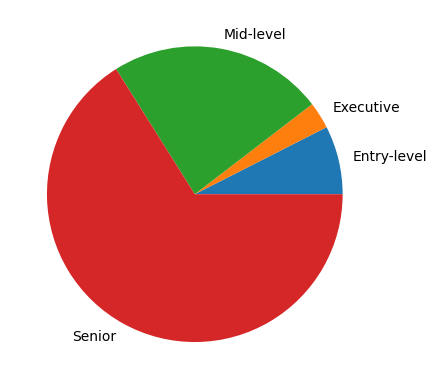

In [ ]:
import matplotlib.pyplot as  plt
df.experience_level.str.get_dummies(sep = ",").sum().plot.pie();

<Axes: ylabel='Frequency'>

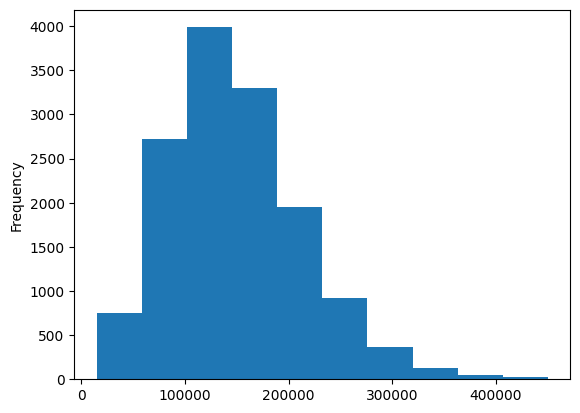

In [ ]:
df["salary_in_usd"].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

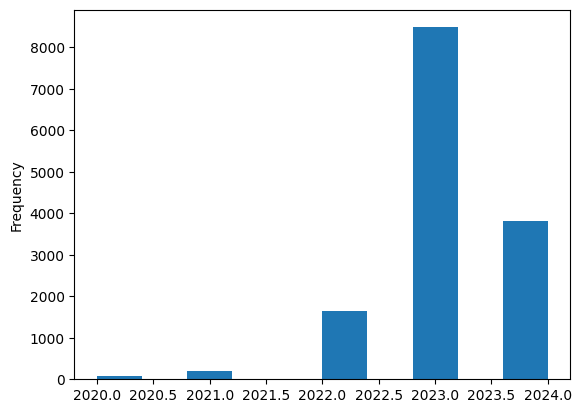

In [ ]:
df["work_year"].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

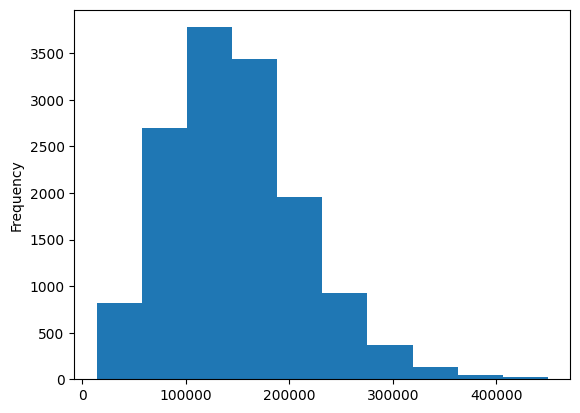

In [ ]:
df["salary"].plot(kind = 'hist')

# Moudi:

### 1. Data Loading and Initial Exploration:

Load the selected dataset into your preferred data analysis environment.


In [2]:
import pandas as pd

df = pd.read_csv('/content/jobs_in_data_2024 (1).csv', sep = ',') # to read file

In [3]:
df # to view the dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
...,...,...,...,...,...,...,...,...,...,...,...,...
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research


Explore the structure of the dataset (number of rows and columns, data types, etc.).

In [5]:
num_rows, num_cols = df.shape # num of cols and rows
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 14199
Number of columns: 12


In [6]:
df.dtypes # every column's type

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
work_setting          object
company_location      object
company_size          object
job_category          object
dtype: object

Examine the first few rows of the dataset to understand its contents

In [7]:
df.head(3) # show the first 3 rows


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization


In [8]:
df.tail(3) # show last 3 rows


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research
14198,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,United States,Remote,United States,L,Data Analysis


In [10]:
df.sample(3) # 3 randoms rows

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
3964,2023,Mid-level,Full-time,Data Scientist,144000,USD,144000,United States,Remote,United States,M,Data Science and Research
9214,2023,Senior,Full-time,Applied Scientist,260000,USD,260000,United States,In-person,United States,L,Data Science and Research
4627,2023,Executive,Full-time,NLP Engineer,150000,USD,150000,United States,In-person,United States,M,Machine Learning and AI


In [16]:
df.columns # names of dataframe


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

### 2. Data Cleaning:

Handle missing values appropriately (e.g., imputation, deletion, etc.).

In [17]:
miss_values = df.isnull().sum() # to check missing values
miss_values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [ ]:
# df_dropna = df.dropna() # drop rows with missing values
##df_dropna

In [ ]:
## f_fillna = df.fillna(1) # fill missing values with specific value
##f_fillna

Check for and handle any duplicate entries.

In [20]:
dup_rows = df.duplicated() # check for duplicate
dup_rows.sum() # if used sum() fun will sum the total duplicate , if not will display t or f

5493

In [ ]:
##drop_dep = df.drop_duplicates(inplace= True) # remove duplicate rows
##drop_dep


Convert categorical variables into the appropriate data type if necessary